<h1>Worked example one <h1>
 

import statement

In [13]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact, Select
from IPython.display import display


Importing the csv file as a dataset

In [14]:
df= pd.read_csv('datasets\dataset.csv')

Displaying the dataset

In [15]:
df

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0
...,...,...,...,...,...,...,...,...,...
4994,-2019295583,15,"""2019-12-07 22:02:29""",chapter-1,roestenburg,344,65,486,0
4995,-2019295583,3,"""2019-11-26 07:44:44""",chapter-1,urma2,2210,500,786,1
4996,-2019295583,2,"""2019-11-26 07:46:14""",chapter-1,urma2,2210,500,786,1
4997,-2019295583,5,"""2019-11-12 13:47:10""",chapter-7,urma2,2210,500,786,1


Creating the edgelist: step one sort by id and datecreated

In [16]:
df=df.sort_values(by=['user_id','date_created'])


Set the book column to equal the source column

In [17]:
df["source"] =df["book"]

Shift columns up to create target and user check

In [18]:
df["target"]= df["source"].shift(-1)  
df["user_check"]= df["user_id"].shift(-1)

Drop rows where the user_id is not equal to the id_check

In [19]:
df['keep_drop'] = np.where((df['user_check'] == df['user_id'])
                     , df['user_id'], np.nan)

In [20]:
df=df.dropna(subset=["keep_drop"])

In [21]:
G=nx.from_pandas_edgelist(df,"source",'target', create_using=nx.DiGraph)

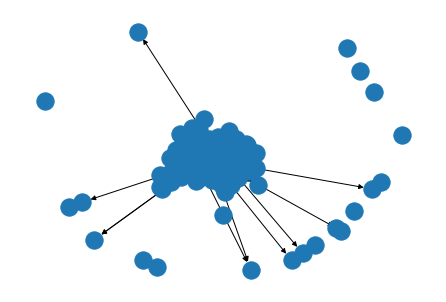

In [22]:
nx.draw(G)


Converting to csv for use in section 2

In [23]:
df.to_csv('gephi_data.csv')

In [24]:
df

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book,source,target,user_check,keep_drop
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1,fain3,ramamurthy,-2.146355e+09,-2.146355e+09
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1,ramamurthy,thomas,-2.146355e+09,-2.146355e+09
29,-2145886989,10,"""2019-12-10 13:07:05""",chapter-4,mcnamara,2533,461,880,1,mcnamara,mcnamara,-2.145887e+09,-2.145887e+09
32,-2145886989,10,"""2019-12-10 13:41:25""",chapter-4,mcnamara,2533,461,880,1,mcnamara,mcnamara,-2.145887e+09,-2.145887e+09
7,-2145886989,1,"""2019-12-10 19:37:20""",chapter-1,mcnamara,2533,461,880,1,mcnamara,mcnamara,-2.145887e+09,-2.145887e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,-2019295583,6,"""2019-12-07 16:00:11""",chapter-1,roestenburg,344,65,486,0,roestenburg,roestenburg,-2.019296e+09,-2.019296e+09
4990,-2019295583,10,"""2019-12-07 16:09:21""",chapter-1,roestenburg,344,65,486,0,roestenburg,roestenburg,-2.019296e+09,-2.019296e+09
4991,-2019295583,102,"""2019-12-07 16:14:21""",chapter-1,roestenburg,344,65,486,0,roestenburg,roestenburg,-2.019296e+09,-2.019296e+09
4992,-2019295583,107,"""2019-12-07 17:51:22""",chapter-1,roestenburg,344,65,486,0,roestenburg,roestenburg,-2.019296e+09,-2.019296e+09
